In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

In [2]:
#APOKASC file & file variables
hdul = fits.open(r"/Users/amber3/Desktop/SSI/APOKASC_cat_v6.7.2.fits")
#hdul.info()
hdu = hdul[1]
data = hdu.data
#print(np.shape(data))
KIC_A = hdu.data['KEPLER_INT'] 
Logg_A = hdu.data['DR16_LOGG_COR']
Logg_err = hdu.data['DR16_LOGG_COR_ERR']
Teff_A = hdu.data['DR16_TEFF_COR']
Teff_err = hdu.data['DR16_TEFF_COR_ERR']
FeH_A = hdu.data['DR16_M_H_COR']
FeH_A_err = hdu.data['Dr16_M_H_COR_ERR']
#print(Logg_A)
FeH_err = hdu.data['DR16_M_H_COR_ERR']
R_APO3 = hdu.data['APOKASC3P_RADIUS']
R_APO3_err = hdu.data['APOKASC3P_RADIUS_ERR']
R_Gaia = hdu.data['GAIA_RADIUS'] #no error on this radius
M_APO3 = hdu.data['APOKASC3P_MASS']
M_APO3_err = hdu.data['APOKASC3P_MASS_ERR']

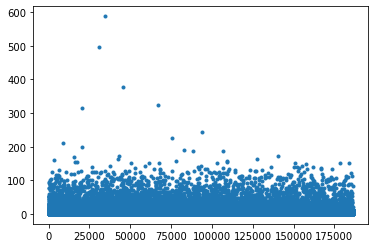

In [47]:
#read in 2020 Berger R file, follow same process
hdul = fits.open(r"/Users/amber3/Desktop/asu.fit")
hdu = hdul[1]
KIC_Berger = hdu.data['KIC']
Berger_rad = hdu.data['Rad']
Berger_upper_err = hdu.data['E_Rad']
Berger_lower_err = hdu.data['e_rad_lc']
plt.plot(Berger_rad, '.')
#compare 2020 Berger radii with APO3 R
#intersection of both KIC and plotting both radii (one against the other)

In [36]:
common_KIC, A_indices, b_indices = np.intersect1d(KIC_A, KIC_b, return_indices=True)
#print(np.shape(A_indices), np.shape(b_indices))
good_indices = np.where((Teff_A[A_indices] > 0) & (R_APO3[A_indices] > 0))
bad_indices = np.where(np.logical_or(Teff_A[A_indices] <= 0, R_APO3[A_indices] <= 0))
#bad_T_indices = np.where(Teff_A[A_indices] <= 0)
#bad_R_indices = np.where(R_APO3[A_indices] <= 0)
#print(Teff_A[A_indices[bad_T_indices]], R_APO3[A_indices[bad_R_indices]])
print(Teff_A[A_indices[bad_indices]], R_APO3[A_indices[bad_indices]])
print(bad_indices)
KIC_b = KIC_b[b_indices]
b_indices = b_indices[good_indices]
A_indices = A_indices[good_indices]
print(np.where(Teff_A[A_indices] < 0))
print(A_indices) #this seems to be working but then it doesn't below
print(np.where(R_APO3[A_indices] < 0))

Amp_HV1 = np.array(data_b[b_indices,0,6])
Amp_HV1_err = np.array(data_b[b_indices,1,6])
Amp_HV2 = np.array(data_b[b_indices,0,9])
Amp_HV2_err = np.array(data_b[b_indices,1,9])
Freq_HV1 = np.array(data_b[b_indices,0,7])
Freq_HV1_err = np.array(data_b[b_indices,1,7])
Freq_HV2 = np.array(data_b[b_indices,0,10])
Freq_HV2_err = np.array(data_b[b_indices,1,10])
Evol_stage = np.array(data_b[b_indices,0,3])
#print(KIC_A, KIC_b)

[-9999.99  -9999.99  -9999.99   4805.594 -9999.99  -9999.99  -9999.99
 -9999.99  -9999.99  -9999.99 ] [-9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999.]
(array([ 318,  761,  794, 1898, 2156, 2211, 3250, 3297, 3401, 3605]),)
(array([], dtype=int64),)
[ 863 4166 4232 ... 5782 5784 5795]
(array([], dtype=int64),)


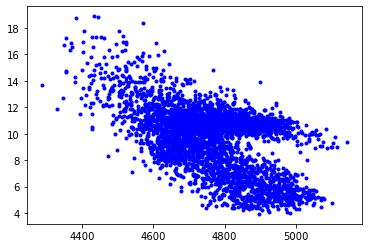

In [37]:
plt.plot(Teff_A[A_indices], R_APO3[A_indices], 'b.')

In [38]:
R_APO3_final = R_APO3[A_indices]
R_APO3_final_err = R_APO3_err[A_indices]
R_Gaia_final = R_Gaia[A_indices] #no err yet
#print(np.shape(Amp_HV1), np.shape(R_APO3_final))#bruh

logg_final = Logg_A[A_indices]
logg_final_err = Logg_err[A_indices]
Teff_final = Teff_A[A_indices]
print(Teff_final)
print(np.where(Teff_final < 0)) 
log_Teff_final = np.log10(Teff_final)
Teff_final_err = Teff_err[A_indices]
Teff_err_log = ((Teff_final_err)/(log_Teff_final))/np.log(10) 
FeH_final = FeH_A[A_indices]
FeH_final_err = FeH_A_err[A_indices]
#print(log_Teff_final) #runtime warning with neg values?
#print(Teff_err_log)

rpw = 2

Amp_HV1_APO3 =  Amp_HV1 * R_APO3_final**rpw
Amp_HV1_APO3_err = ((Amp_HV1_err/Amp_HV1) + (rpw*R_APO3_final_err/R_APO3_final)) * Amp_HV1_APO3
Amp_HV1_APO3_err_log = ((Amp_HV1_APO3_err)/(Amp_HV1_APO3))/np.log(10)

Amp_HV2_APO3 =  Amp_HV2 * R_APO3_final**rpw
Amp_HV2_APO3_err = ((Amp_HV2_err/Amp_HV2) + (rpw*R_APO3_final_err/R_APO3_final)) * Amp_HV2_APO3
Amp_HV2_APO3_err_log = ((Amp_HV2_APO3_err)/(Amp_HV2_APO3))/np.log(10)

Amp_HV1_Gaia =  Amp_HV1 * R_Gaia_final**rpw
#no err

Amp_HV2_Gaia =  Amp_HV2 * R_Gaia_final**rpw
#no err

Amp_HV1_err_log = ((Amp_HV1_err)/(Amp_HV1))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_err)/(Amp_HV2))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_err)/(Freq_HV1))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_err)/(Freq_HV2))/np.log(10)

[4635.539  4786.9126 4781.582  ... 4898.131  4992.812  4641.728 ]
(array([], dtype=int64),)


A1_RG
[ 3.65773256 -9.75343131 -1.93054871 -0.0323873 ]
[0.00383415 0.52408347 0.01171772 0.01635012]
A1_RC
[  4.08869488 -19.31102444  -1.33376156  -0.80702151]
[0.01173537 0.54429958 0.03153781 0.02359385]
A2_RG
[ 2.9979083  -8.70223622 -2.06085666 -0.01834655]
[0.00425431 0.57752987 0.01283791 0.01783101]
A2_RC
[  3.42893417 -19.77150839  -1.44584805  -0.93976798]
[0.01267877 0.61411842 0.03396103 0.02631364]


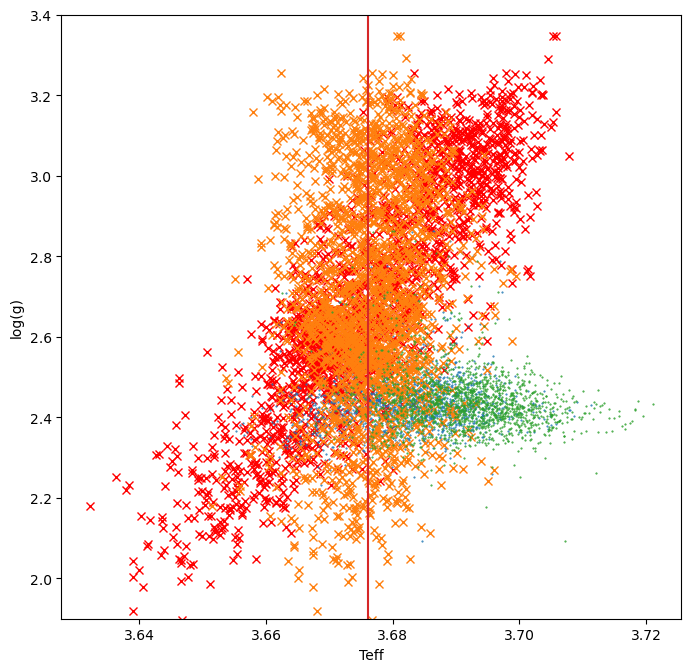

In [41]:
#%matplotlib inline
figure(figsize=(8,8), dpi=100)
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

def logg_fit(X, a, b):
    x = X
    return a + b*x
         
red_giant = np.where(Evol_stage == 1)
red_clump = np.where(Evol_stage == 2)
#print(Teff_final[red_giant])

mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(log_Teff_final[red_giant])
#print(mean_l_teff) #neg value in log_Teff_final bc of runtime warning in Teff_final, printing nan

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7

theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#rotated plots
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))
coeffs = np.ones((4, 6, 2)) #switch 2 and 4?
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV1[red_giant]), sigma=(Freq_HV1_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV1[red_clump]), sigma=(Freq_HV1_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

plt.plot(np.log10(Teff_final[red_giant]), logg_final[red_giant], 'rx')
plt.plot(np.log10(Teff_final[red_clump]), logg_final[red_clump], '.', ms=1)
plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x')
plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, '.', ms=1)
plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
#plt.xlim(2.93, 4.43)
plt.ylim(1.9, 3.4)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

In [44]:
#fit in rotated atm params with respect to APO3 R corrected amps

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_APO3[red_giant]), sigma=(Amp_HV1_APO3_err_log[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_APO3[red_clump]), sigma=(Amp_HV1_APO3_err_log[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_APO3[red_giant]), sigma=(Amp_HV2_APO3_err_log[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_APO3[red_clump]), sigma=(Amp_HV2_APO3_err_log[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.53200178 -4.3710887  -2.88380897  0.29588743]
[0.00571386 0.86228546 0.01865749 0.02668646]
A1_RC
[  6.1612201  -20.29505145  -1.42967733  -0.73369487]
[0.01286149 0.59676456 0.03449662 0.02591193]
A2_RG
[ 4.86905181 -3.56099494 -3.01327139  0.31151279]
[0.0062959  0.91492644 0.01985183 0.02812973]
A2_RC
[  5.5112393  -21.39454309  -1.54900808  -0.88808522]
[0.01419678 0.68342842 0.03800278 0.02938243]


In [45]:
#fit in rotated atm params with respect to Gaia R corrected amps
#no sigma

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_Gaia[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_Gaia[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_Gaia[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_Gaia[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[  5.60056673 -10.98516783  -2.97196539   0.29236591]
[0.02272763 3.58528205 0.07108612 0.10944029]
A1_RC
[  6.17672043 -14.58639915  -1.73304208  -0.2996555 ]
[0.13086921 5.83395293 0.36442595 0.25328876]
A2_RG
[  4.93055261 -10.92535129  -3.09648937   0.28460663]
[0.02277741 3.59313447 0.07124181 0.10967998]
A2_RC
[  5.52006305 -14.97379937  -1.81247755  -0.43831368]
[0.13092139 5.83627899 0.36457125 0.25338975]


In [ ]:
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final[red_giant]
log_Teff_final_RC = log_Teff_final[red_clump]
logg_final_RG = logg_final[red_giant]
logg_final_RC = logg_final[red_clump]
FeH_final_RG = FeH_final[red_giant]
FeH_final_RC = FeH_final[red_clump]
print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
print(np.size(index_RC), np.size(index_RG))
print(index_RG)
np.shape(index_RG)